# **FPL: A DS Approach for Team Selection**

## 1. Enviroment Configuration

>Import Libraries

In [96]:
# Import Libraries
import api as client
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pprint


## 2. Load Client


>Custom python [wrapper](./api.py) for FPL REST API

In [97]:
client = client.FPLClient()

## 3. Auxiliary Dataframes and Functions

>Maps Column _mValue_ from DataFrame _mapper_ by _mIndex_ to Dataframe _df_ by _dfIndex_

In [98]:
# Maps two columns on two DataFrames

def getMappedDF(df,dfIndex,mapper,mIndex,mValue):
    mapperFilter = mapper[[mIndex,mValue]].copy()
    df = pd.merge(df, mapperFilter,
                  how='left',
                  left_on=dfIndex,
                  right_on=mIndex)
    if dfIndex != mIndex:
        try:
            df.drop(mIndex,axis=1,inplace=True)
        except:
            pass
    return df

In [99]:
# Teams DataFrame general data

teams = client.general.teams_details()
teams.head()   
    

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1200,1270,1160,1230,1160,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1090,1100,1110,1110,1070,1090,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1050,1070,1070,1110,1040,1070,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,...,None,False,0,1100,1150,1100,1150,1140,1170,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,...,None,False,0,1140,1140,1170,1160,1150,1170,131


In [100]:
# Players DataFrame general data

players = client.general.players_details()
players.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,100.0,100.0,58822,0,0,-3,3,0,2,1.2,...,544,157,261,81,376,141,401,148,0.00000,0.00000
1,NaN,NaN,84450,0,0,1,-1,1,3,2.8,...,171,99,136,62,42,20,83,28,0.07719,0.46312
2,100.0,100.0,153256,0,0,-3,3,1,3,1.2,...,551,284,262,128,343,150,209,69,0.00000,0.00000
3,NaN,NaN,156074,0,0,-3,3,0,2,0.8,...,552,163,317,108,379,144,419,155,0.00000,0.00000
4,100.0,100.0,167199,0,0,-2,2,0,3,5.2,...,260,157,44,22,73,35,245,80,0.09385,0.65693


In [101]:
# Players' position mapping

playersType = pd.DataFrame(
    {
        'element_type':list(range(1,5)),
        'type_string': ['Goalkeeper','Defense','Midfield','Forward']
    }
)
players = getMappedDF(players,'element_type',playersType,'element_type','type_string')
players.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90,type_string
0,100.0,100.0,58822,0,0,-3,3,0,2,1.2,...,157,261,81,376,141,401,148,0.00000,0.00000,Defense
1,NaN,NaN,84450,0,0,1,-1,1,3,2.8,...,99,136,62,42,20,83,28,0.07719,0.46312,Midfield
2,100.0,100.0,153256,0,0,-3,3,1,3,1.2,...,284,262,128,343,150,209,69,0.00000,0.00000,Midfield
3,NaN,NaN,156074,0,0,-3,3,0,2,0.8,...,163,317,108,379,144,419,155,0.00000,0.00000,Defense
4,100.0,100.0,167199,0,0,-2,2,0,3,5.2,...,157,44,22,73,35,245,80,0.09385,0.65693,Midfield


In [102]:
fixtures = pd.DataFrame(client.fixtures.all())
fixtures.head()

,code,event,finished,finished_provisional,id,kickoff_time,minutes,provisional_start_time,started,team_a,team_a_score,team_h,team_h_score,stats,team_h_difficulty,team_a_difficulty,pulse_id
0,2292871,NaN,False,False,61,None,0,False,None,8,NaN,1,NaN,[],2,4,74971
1,2292921,NaN,False,False,111,None,0,False,None,13,NaN,1,NaN,[],5,4,75021
2,2292870,NaN,False,False,62,None,0,False,None,5,NaN,3,NaN,[],3,2,74972
3,2292882,NaN,False,False,73,None,0,False,None,7,NaN,5,NaN,[],2,3,74983
4,2292883,NaN,False,False,74,None,0,False,None,12,NaN,6,NaN,[],4,4,74984


## 3. Feature Engineering

#### 3.1. Main DataFrame extraction

In [103]:
# Gets DF of all player ratings for every match

def get_all_players():
    df_all = pd.DataFrame()
    for player_id in players['id'].tolist():
        a = client.details.all(player_id)
        df_p = pd.DataFrame(a['history'])
        if df_all.__len__() == 0:
            df_all = df_p
        else:
            df_all = pd.concat([df_all, df_p])
    return df_all

_df = get_all_players()
df = _df.copy()

In [104]:
df = _df.copy()

In [105]:
df[df.columns[:20]].head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves
0,1,1,7,0,False,2022-08-05T19:00:00Z,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,1,11,10,0,True,2022-08-13T14:00:00Z,4,2,2,0,0,0,0,0,0,0,0,0,0,0
2,1,21,3,0,False,2022-08-20T16:30:00Z,0,3,3,0,0,0,0,0,0,0,0,0,0,0
3,1,31,9,0,True,2022-08-27T16:30:00Z,2,1,4,0,0,0,0,0,0,0,0,0,0,0
4,1,41,2,0,True,2022-08-31T18:30:00Z,2,1,5,0,0,0,0,0,0,0,0,0,0,0


#### 3.2. Mapping

In [106]:
df = getMappedDF(df,'fixture',fixtures,'id','event')

In [107]:
_tableDF = pd.DataFrame()
_list = df.event.unique()
_list.sort()
for _ in _list:
    _tableWDF = client.fixtures.get_table(_)
    _tableWDF['event'] = _
    if _tableDF.__len__() == 0:
        _tableDF = _tableWDF
    else:
        _tableDF = pd.concat([_tableDF, _tableWDF])

_tableDF.reset_index(inplace=True)
_tableDF['index'] += 1
_tableDF.columns = ['position_oppo', 'opponent_team', 'points', 'favor', 'against', 'diff', 'event']
df = pd.merge(df, _tableDF[['position_oppo', 'opponent_team', 'event']], how='left',
              left_on=['opponent_team', 'event'],
              right_on=['opponent_team', 'event'])

_fixtureMerge = fixtures[['team_h', 'team_a', 'event']].copy()
_oppoVisitDF = df.loc[df['was_home']].copy()
_fixtureMerge.columns = ['team', 'opponent_team', 'event']
_oppoVisitDF = pd.merge(_oppoVisitDF, _fixtureMerge, how='left',
                       left_on=['opponent_team', 'event'],
                       right_on=['opponent_team', 'event'])

_oppoHomeDF = df.loc[~df['was_home']].copy()
_fixtureMerge.columns = ['opponent_team', 'team', 'event']
_oppoHomeDF = pd.merge(_oppoHomeDF, _fixtureMerge, how='left',
                      left_on=['opponent_team', 'event'],
                      right_on=['opponent_team', 'event'])

df = pd.concat([_oppoVisitDF, _oppoHomeDF], ignore_index=True)
_tableDF.columns = ['position', 'team', 'points', 'favor', 'against', 'diff', 'event']
df = pd.merge(df, _tableDF[['position', 'team', 'event']], how='left',
              left_on=['team', 'event'],
              right_on=['team', 'event'])


df.sort_values(by = ['element', 'fixture']).reset_index(drop=True,inplace=True)

In [108]:
dfMapped = getMappedDF(df,'team',teams,'id','short_name')
dfMapped = getMappedDF(dfMapped,'element',players,'id','web_name')
dfMapped = getMappedDF(dfMapped,'element',players,'id','element_type')

In [109]:
dfMapped.head()

,element,fixture,opponent_team,total_points,was_home,kickoff_time,team_h_score,team_a_score,round,minutes,...,selected,transfers_in,transfers_out,event,position_oppo,team,position,short_name,web_name,element_type
0,1,11,10,0,True,2022-08-13T14:00:00Z,4,2,2,0,...,24193,1361,6530,2.0,11.0,1,2.0,ARS,Cédric,2
1,1,31,9,0,True,2022-08-27T16:30:00Z,2,1,4,0,...,18825,577,3565,4.0,7.0,1,1.0,ARS,Cédric,2
2,1,41,2,0,True,2022-08-31T18:30:00Z,2,1,5,0,...,17790,405,2016,5.0,15.0,1,1.0,ARS,Cédric,2
3,1,81,18,0,True,2022-10-01T11:30:00Z,3,1,9,0,...,15362,64,1636,9.0,3.0,1,1.0,ARS,Cédric,2
4,1,91,12,0,True,2022-10-09T15:30:00Z,3,2,10,0,...,14630,148,976,10.0,9.0,1,1.0,ARS,Cédric,2


> Seaborn Config

In [110]:
# Seaborn configuration
%matplotlib inline
# sns.set_palette(sns.color_palette('magma',n_colors=20))
# sns.barplot(data=df,x='team',y='total_points',estimator=sum)
_widthTotal = 15
_heightChart = 3

### 3.3 Team: Highest points

<AxesSubplot:xlabel='short_name', ylabel='total_points'>

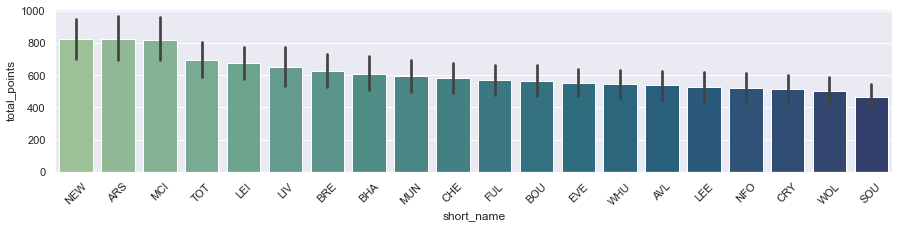

In [111]:
plt.figure(figsize=(_widthTotal,_heightChart))
plt.xticks(rotation=45)
sns.barplot(data =dfMapped,
            x='short_name',
            y='total_points',
            order = dfMapped.groupby('short_name').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index,
            estimator=sum,
            palette='crest')

### 3.4. Players: Highest Score

In [112]:
_dfMappedSum = dfMapped.groupby('element').sum(numeric_only=True)['total_points']
_dfMappedSum2 = dfMapped.groupby('element')['web_name'].apply(pd.Series.mode)
_dfMappedSum= _dfMappedSum.to_frame().join(_dfMappedSum2).sort_values('total_points',ascending=False)
_dfMappedSum.head()

,,total_points,web_name
element,,,
318,0,123,Haaland
427,0,102,Kane
357,0,96,Trippier
369,0,93,Almirón
301,0,90,De Bruyne


<AxesSubplot:xlabel='web_name', ylabel='total_points'>

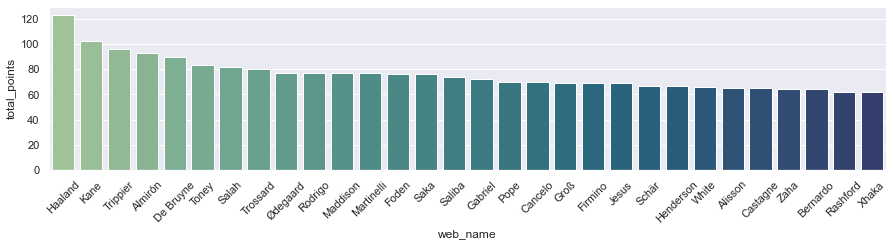

In [113]:
_top = 30
plt.figure(figsize=(_widthTotal,_heightChart))
plt.xticks(rotation=45)
sns.barplot(
            x=_dfMappedSum['web_name'].head(_top),
            y=_dfMappedSum['total_points'].head(_top),
            # estimator=sum,
            palette='crest')

### 3.5 Player/Team Highest Scores

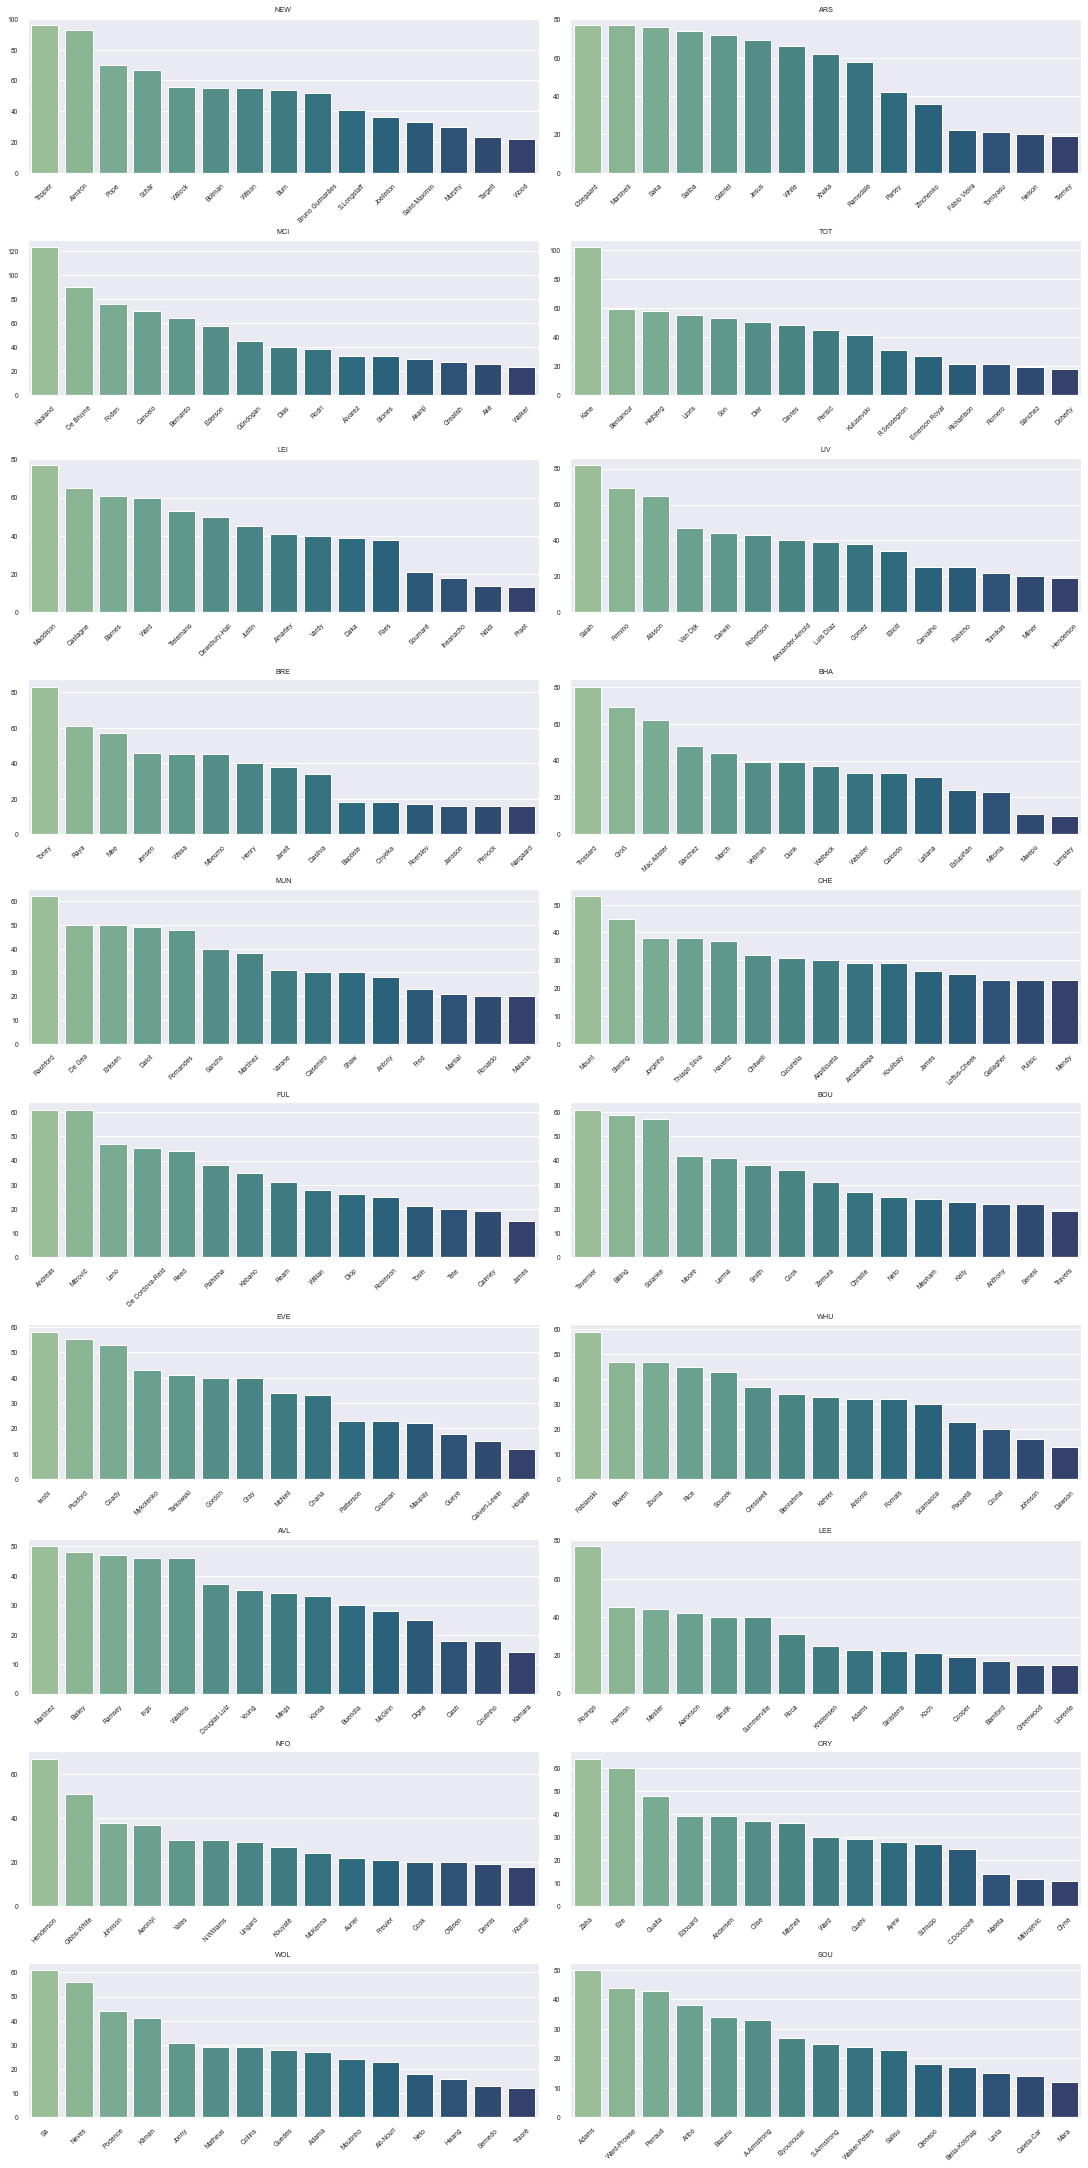

In [114]:
sns.set_theme(font_scale = 0.6)
_chartsCol = 2
_chartsRow = 10
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True)
_ax = _ax.flatten()
_top = 15
_topTeams = list(dfMapped.groupby('short_name').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index)
for _ in range(0,len(_topTeams)):
    _team = _topTeams[_]
    _dfMappedSumTeam = dfMapped.loc[dfMapped['short_name']==_team].groupby('web_name').sum(numeric_only=True)['total_points'].sort_values(ascending=False)
    _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(_team)
    _ax[_].xaxis.label.set_visible(False)
    
    _plot = sns.barplot(
                x=_dfMappedSumTeam.head(_top).index,
                y=_dfMappedSumTeam.head(_top).values,
                # estimator=sum,
                palette='crest',
                ax=_ax[_])

sns.set_theme(font_scale = 1)

### 3.6 Positions Highest Score

<AxesSubplot:xlabel='element_type', ylabel='total_points'>

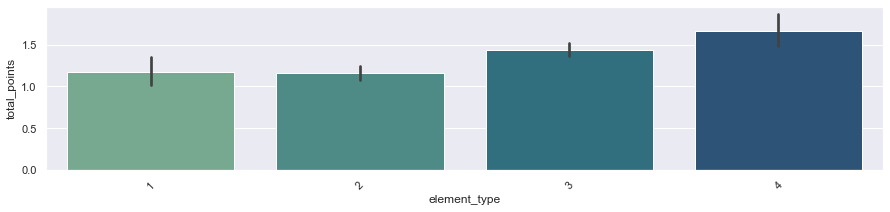

In [115]:
plt.figure(figsize=(_widthTotal,_heightChart))
plt.xticks(rotation=45)
sns.barplot(
            x=dfMapped['element_type'],
            y=dfMapped['total_points'],
            # estimator=mean,
            palette='crest')

### 3.7 Player/Possition Highest Point

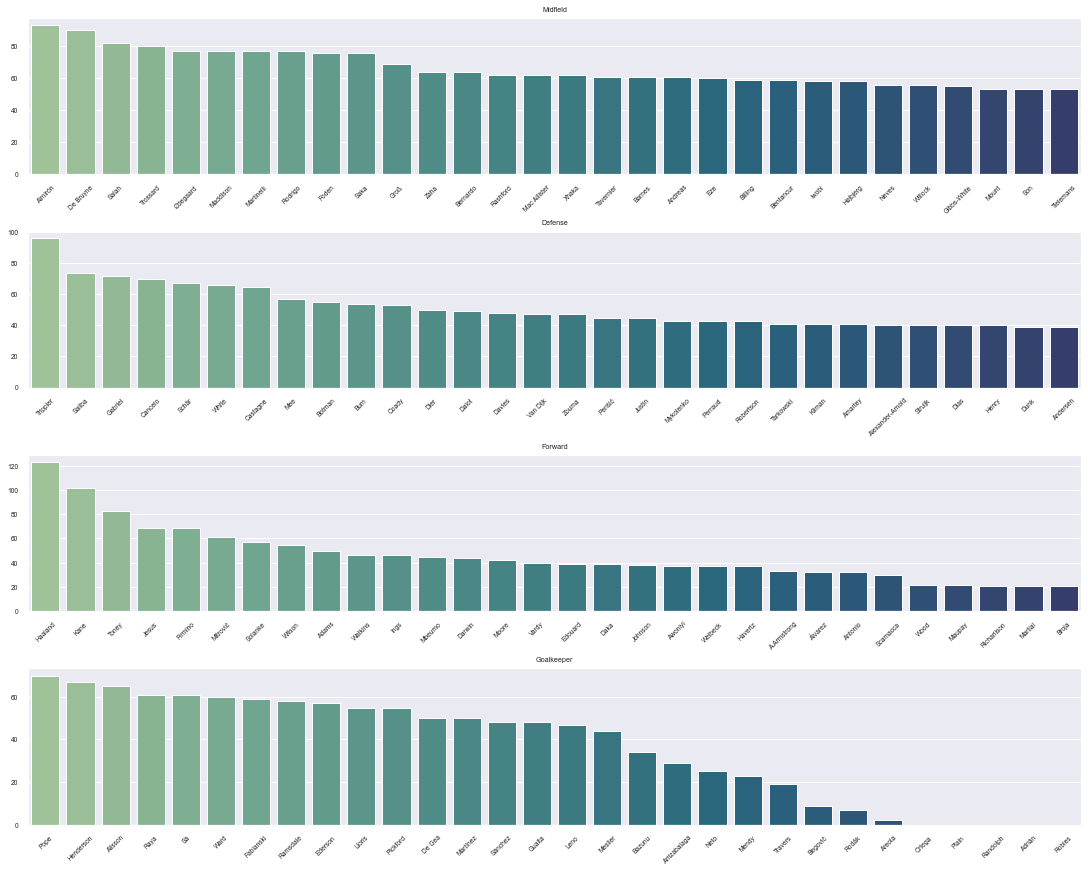

In [116]:
sns.set_theme(font_scale = 0.6)
_chartsCol = 1
_chartsRow = 4
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True)
_ax = _ax.flatten()
_top = 30
_topPositions = list(dfMapped.groupby('element_type').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index)
for _ in range(0,len(_topPositions)):
    _position = _topPositions[_]
    _dfMappedSumTeam = dfMapped.loc[dfMapped['element_type']==_position].groupby('web_name').sum(numeric_only=True)['total_points'].sort_values(ascending=False)
    _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(playersType.set_index('element_type').loc[_position,'type_string'])
    _ax[_].xaxis.label.set_visible(False)
    
    sns.barplot(
        x=_dfMappedSumTeam.head(_top).index,
        y=_dfMappedSumTeam.head(_top).values,
        # estimator=sum,
        palette='crest',
        ax=_ax[_])

sns.set_theme(font_scale = 1)

### 3.8. Position/Team HS

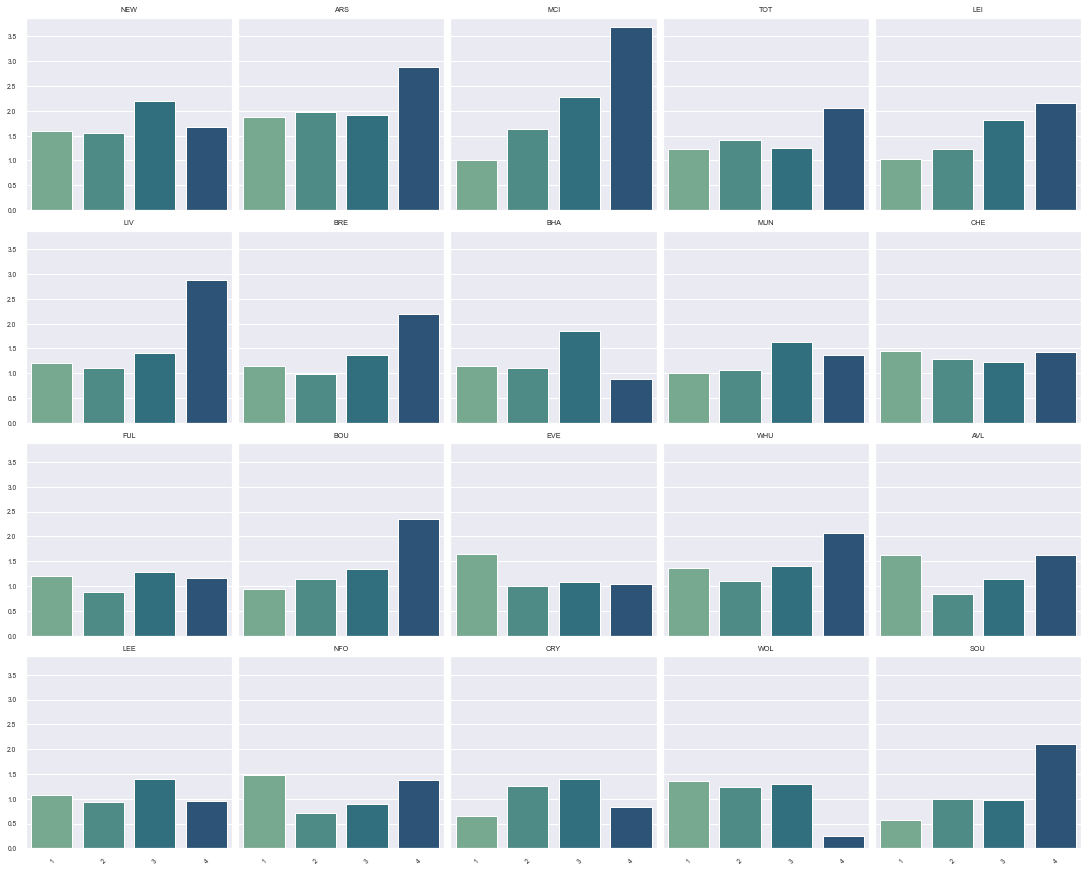

In [117]:
sns.set_theme(font_scale = 0.6)
_chartsRow = 4
_chartsCol = 5
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True,sharex=True,sharey=True)
_ax = _ax.flatten()
# _top = 30
_topTeams = list(dfMapped.groupby('short_name').sum(numeric_only=True).sort_values(by='total_points',ascending=False).index)
for _ in range(0,len(_topTeams)):
    _team = _topTeams[_]
    _dfMappedSumTeam = dfMapped.loc[dfMapped['short_name']==_team].groupby('element_type').mean(numeric_only=True)['total_points'].sort_values(ascending=False)
    _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(_team)
    _ax[_].xaxis.label.set_visible(False)
    
    sns.barplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_dfMappedSumTeam.index,
        y=_dfMappedSumTeam.values,
        # estimator=sum,
        palette='crest',
        ax=_ax[_])

sns.set_theme(font_scale = 1)

### 3.9. Players/Fixture HS

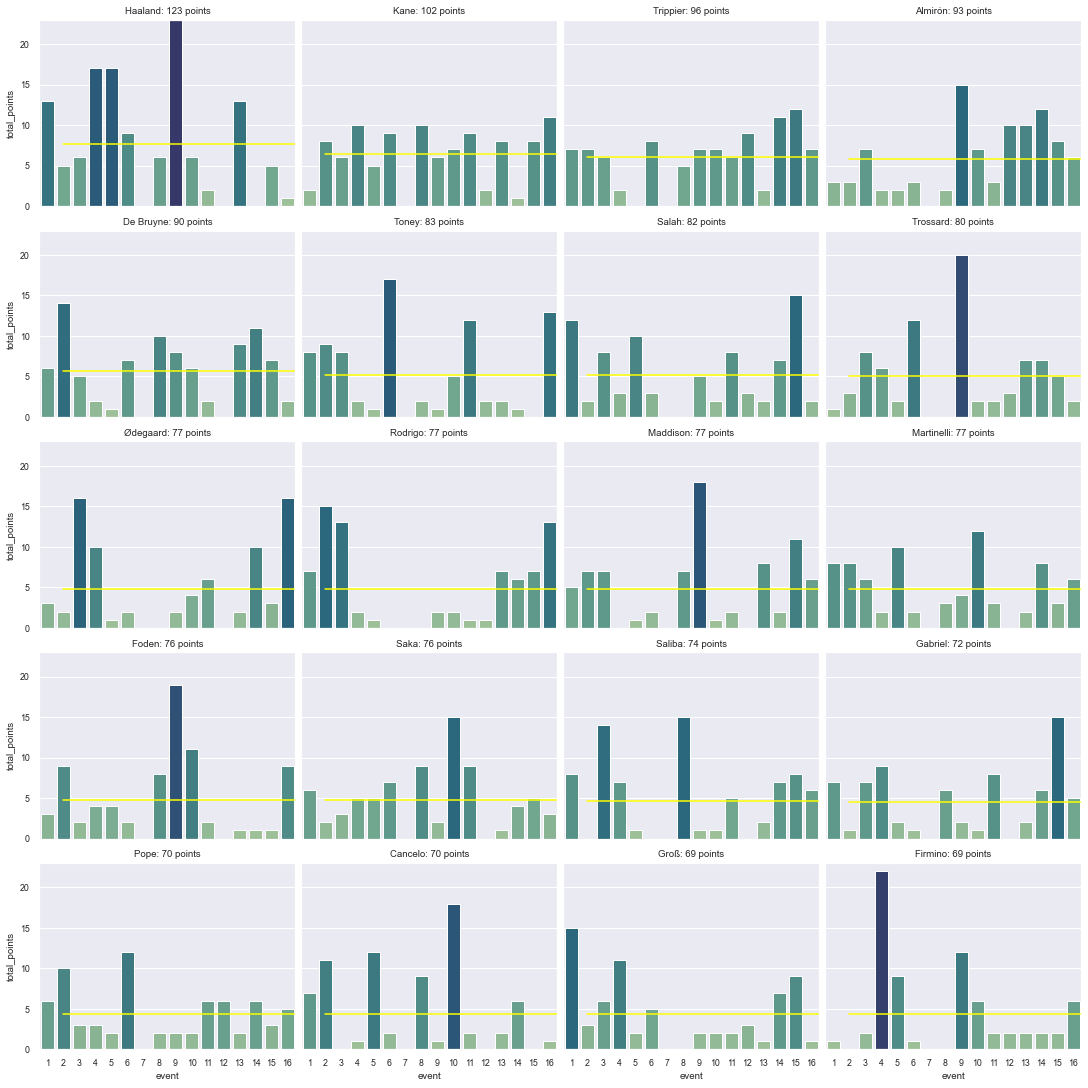

In [118]:
_top = 20
_topPlayers = _dfMappedSum.head(_top)
_topIndex = _topPlayers.index.get_level_values(0).tolist()
_elementsEvents = dfMapped.groupby(by=['element','event']).sum(numeric_only=True)
_elementsEvents =_elementsEvents.loc[_elementsEvents.index.get_level_values(0).isin(_topIndex)].copy()

sns.set_theme(font_scale = 0.8)
_chartsCol = 4
_chartsRow = int(_top/_chartsCol)
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True,sharex=True,sharey=True)
_ax = _ax.flatten()

_norm = plt.Normalize(0, _elementsEvents['total_points'].max())
_cmap = plt.get_cmap('crest')

for _ in range(0,len(_topIndex)):
    _topCurrent = _topIndex[_]
    _currentName = players.set_index('id').loc[_topCurrent,'web_name']
    _elementEvents = _elementsEvents.loc[_elementsEvents.index.get_level_values(0)==_topCurrent]
    _elementEvents.reset_index(level=0, inplace=True, drop=True)
    _elementEvents=_elementEvents.reindex(np.arange(_elementEvents.index.min(), _elementEvents.index.max()+1)).sort_index()
    _elementEvents.fillna(0,inplace=True)
    # _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(_currentName + ': {} points'.format(int(_elementEvents['total_points'].sum())))
    _ax[_].set_ylim(0, _elementsEvents['total_points'].max())
    _colors = _cmap(_norm(_elementEvents['total_points']))
    # plt.colorbar(plt.cm.ScalarMappable(_norm,_cmap),ax=_ax[_])
    # _ax[_].xaxis.label.set_visible(False)
    sns.lineplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_elementEvents.index.astype(int),
        y=[_elementEvents['total_points'].mean()]*_elementEvents.__len__(),
        color='yellow',
        # estimator=sum,,
        ax=_ax[_])
    sns.barplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_elementEvents.index.astype(int),
        y=_elementEvents['total_points'],
        # color=_colors,
        # estimator=sum,
        palette=_colors,
        ax=_ax[_])

sns.set_theme(font_scale = 1)


### 3.10 Best Recent Form

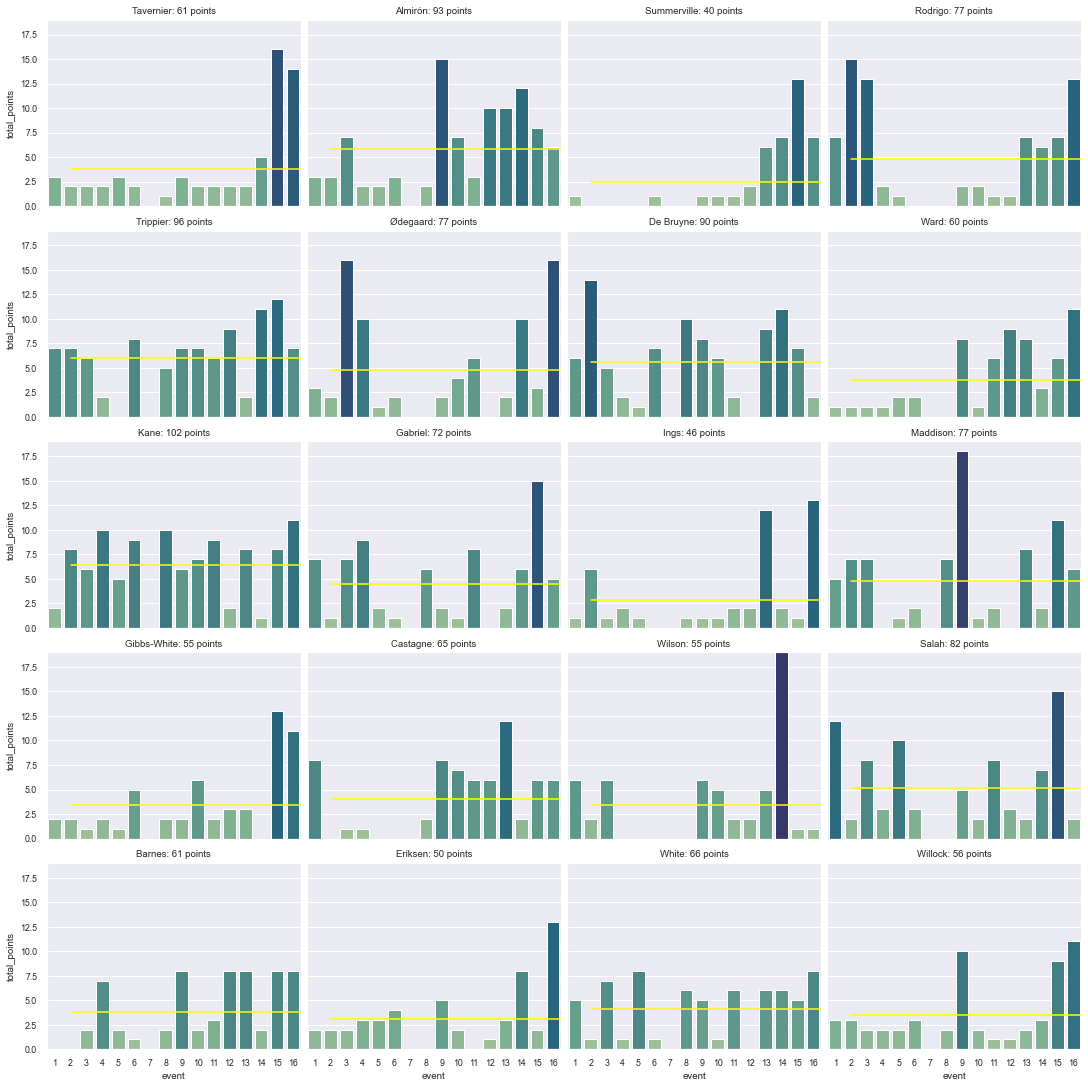

In [119]:
_top = 20
_topLastFixtures = 4
_dfMappedLast = dfMapped.loc[dfMapped['event']>dfMapped['event'].max()-_topLastFixtures].copy()
_dfMappedLastSum = _dfMappedLast.groupby('element').sum(numeric_only=True)['total_points'].sort_values(ascending=False)
_topPlayers = _dfMappedLastSum.head(_top)
_topIndex = _topPlayers.index.tolist()
_topIndex
_elementsEvents = dfMapped.groupby(by=['element','event']).sum(numeric_only=True)
_elementsEvents =_elementsEvents.loc[_elementsEvents.index.get_level_values(0).isin(_topIndex)].copy()

sns.set_theme(font_scale = 0.8)
_chartsCol = 4
_chartsRow = int(_top/_chartsCol)
_fig, _ax = plt.subplots(_chartsRow,_chartsCol, figsize=(_widthTotal,_chartsRow*_heightChart),constrained_layout=True,sharex=True,sharey=True)
_ax = _ax.flatten()

_norm = plt.Normalize(0, _elementsEvents['total_points'].max())
_cmap = plt.get_cmap('crest')

for _ in range(0,len(_topIndex)):
    _topCurrent = _topIndex[_]
    _currentName = players.set_index('id').loc[_topCurrent,'web_name']
    _elementEvents = _elementsEvents.loc[_elementsEvents.index.get_level_values(0)==_topCurrent]
    _elementEvents.reset_index(level=0, inplace=True, drop=True)
    _elementEvents=_elementEvents.reindex(np.arange(_elementEvents.index.min(), _elementEvents.index.max()+1)).sort_index()
    _elementEvents.fillna(0,inplace=True)
    # _ax[_].tick_params(axis='x', rotation=45)
    _ax[_].set_title(_currentName + ': {} points'.format(int(_elementEvents['total_points'].sum())))
    _ax[_].set_ylim(0, _elementsEvents['total_points'].max())
    _colors = _cmap(_norm(_elementEvents['total_points']))
    # plt.colorbar(plt.cm.ScalarMappable(_norm,_cmap),ax=_ax[_])
    # _ax[_].xaxis.label.set_visible(False)
    sns.lineplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_elementEvents.index.astype(int),
        y=[_elementEvents['total_points'].mean()]*_elementEvents.__len__(),
        color='yellow',
        # estimator=sum,,
        ax=_ax[_])
    sns.barplot(
        # x=playersType.set_index('element_type').sort_index()['type_string'].str[:3],
        x=_elementEvents.index.astype(int),
        y=_elementEvents['total_points'],
        # color=_colors,
        # estimator=sum,
        palette=_colors,
        ax=_ax[_])

sns.set_theme(font_scale = 1)


## ML Algorithms
>1. Lazypredict
>2. pyCaret
>3. SKlearn

In [121]:
colModel = ['element','opponent_team','total_points','was_home','kickoff_time','round','position_oppo','team','element_type','position']
dfModel = dfMapped[colModel].copy()
dfModel['dayWeek'] = pd.to_datetime(dfModel['kickoff_time']).dt.day_of_week
dfModel['hour'] = pd.to_datetime(dfModel['kickoff_time']).dt.hour
dfModel = dfModel[set(dfModel.columns)-set(['kickoff_time'])].copy()
dfModel['was_home'] = dfModel['was_home'].astype(int)

[distfit] >fit..
[distfit] >transform..
[distfit] >[norm      ] [0.0 sec] [RSS: 87.6592] [loc=2.547 scale=0.820]
[distfit] >[expon     ] [0.0 sec] [RSS: 89.401] [loc=1.000 scale=1.547]
[distfit] >[pareto    ] [0.17 sec] [RSS: 89.2997] [loc=-109216106.864 scale=109216107.864]
[distfit] >[dweibull  ] [0.03 sec] [RSS: 85.3845] [loc=2.500 scale=0.811]
[distfit] >[t         ] [0.08 sec] [RSS: 87.6592] [loc=2.547 scale=0.820]
[distfit] >[genextreme] [0.06 sec] [RSS: 87.6042] [loc=2.288 scale=0.844]
[distfit] >[gamma     ] [0.08 sec] [RSS: 87.6722] [loc=-18.709 scale=0.032]
[distfit] >[lognorm   ] [0.19 sec] [RSS: 87.6656] [loc=-118.522 scale=121.064]
[distfit] >[beta      ] [0.14 sec] [RSS: 87.0309] [loc=0.997 scale=3.003]
[distfit] >[uniform   ] [0.0 sec] [RSS: 87.6765] [loc=1.000 scale=3.000]
[distfit] >[loggamma  ] [0.04 sec] [RSS: 87.6325] [loc=-17.804 scale=5.399]
[distfit] >Compute confidence interval [parametric]
[distfit] >plot..


(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\ndweibull\nRSS(c=1.91349, loc=2.50032, scale=0.810915)'}, xlabel='Values', ylabel='Frequency'>)

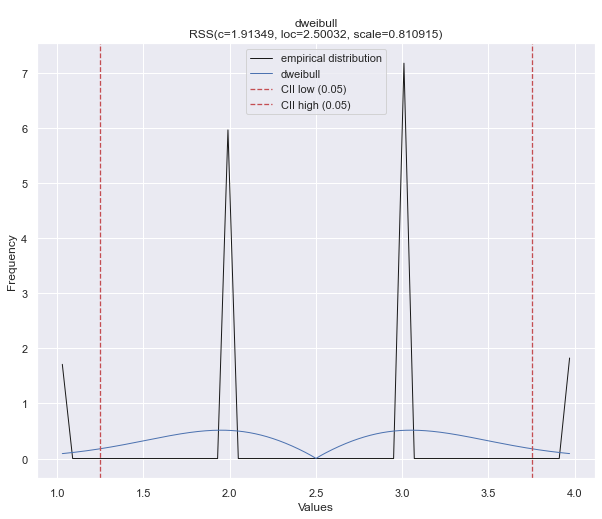

In [128]:
from distfit import distfit
dist = distfit()
distribution = dist.fit_transform(dfModel['element_type'])
dist.plot()


In [127]:
# from evidently.dashboard import Dashboard
# from evidently.tabs import DataDriftTab

# report = Dashboard(tabs=[DataDriftTab()])
# report.calculate(dfModel[:1000],dfModel[1000:],column_mapping=None)
# report.show()